In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def Graph(df, Oy, color='blue', Single=True):
    plt.scatter(df['DateTime'], df[Oy], s=2, color=color)
    plt.xticks(rotation=90)
    plt.xlabel('Дата и время замера')
    plt.ylabel(Oy)
    if Single:
        plt.show()

def BoxMustache(df, Oy, Single=True):
    plt.boxplot(x=df[Oy])
    plt.ylabel(Oy)
    if Single:
        plt.show()

PrimaryData = pd.read_csv('raw_X1.csv', sep=',', decimal='.', parse_dates=['DateTime'])
PrimaryData.pop('Unnamed: 0')
ListOfTrash = pd.Series(PrimaryData.columns.str.contains('Давление'), index=PrimaryData.columns)
for name in PrimaryData.columns:
    if ListOfTrash[name]:
        PrimaryData.pop(name)
PrimaryData.head(5)

,Расход бензина ККР на установку,Расход нафты ККР на установку,Расход бензина на рециркуляцию от Е-1205,Температура бензина ККР на установку,Расход сырья после Р-1101,Показатель соотношения водород к углероду,Расход водорода на смешение перед Е-1101,Температура сырья перед Е-1101,Температура сырья перед Е-1102,Температура сырья перед Е-1103,...,Уровень в емкости V-1205,Возврат ТБ в V-1205 после насосов Р-1203,Расход ТБ из V-1205 после насосов Р-1203,Температура продукта после А-1203,Температура продукта после Е-1205,Расход продукта на выходе с установки,Уровень V-1203,Температура V-1203,Температура верха С-1201,DateTime
0,95.63,32.56,0.0,29.94,146.96,5.31,781.16,32.40,108.61,32.40,...,53.06,5.02,6.24,56.01,32.58,106.00,44.99,20.56,25.55,2022-01-01 00:00:00
1,95.98,32.80,0.0,29.66,147.27,5.30,779.64,32.12,107.79,32.12,...,53.00,5.01,7.32,56.05,32.32,105.53,45.10,20.37,25.33,2022-01-01 01:25:00
2,95.60,32.76,0.0,29.84,146.05,5.34,780.48,32.29,108.28,32.29,...,52.97,5.00,6.96,56.01,32.42,105.52,45.20,20.52,25.49,2022-01-01 02:50:00
3,95.72,32.76,0.0,29.80,146.19,5.34,780.53,32.30,108.11,32.30,...,52.99,5.02,7.60,56.01,32.60,105.62,44.69,20.70,25.75,2022-01-01 04:15:00
4,95.53,32.80,0.0,29.83,145.76,5.32,776.46,32.25,108.12,32.25,...,53.01,5.01,8.16,55.98,32.53,105.62,44.98,20.58,25.59,2022-01-01 05:40:00


In [2]:
TargetName = 'Расход бензина ККР на установку'
TargetVector = PrimaryData[[TargetName, 'DateTime']]
TargetVector.to_csv('TargetVector')
TargetVector.head(5)

,Расход бензина ККР на установку,DateTime
0,95.63,2022-01-01 00:00:00
1,95.98,2022-01-01 01:25:00
2,95.60,2022-01-01 02:50:00
3,95.72,2022-01-01 04:15:00
4,95.53,2022-01-01 05:40:00


In [3]:
FeaturesMatrix = PrimaryData.drop(TargetName, axis=1)
FeaturesMatrix.to_csv('FeaturesMatrix')
FeaturesMatrix.head(5)

,Расход нафты ККР на установку,Расход бензина на рециркуляцию от Е-1205,Температура бензина ККР на установку,Расход сырья после Р-1101,Показатель соотношения водород к углероду,Расход водорода на смешение перед Е-1101,Температура сырья перед Е-1101,Температура сырья перед Е-1102,Температура сырья перед Е-1103,Температура сырья после Е-1103,...,Уровень в емкости V-1205,Возврат ТБ в V-1205 после насосов Р-1203,Расход ТБ из V-1205 после насосов Р-1203,Температура продукта после А-1203,Температура продукта после Е-1205,Расход продукта на выходе с установки,Уровень V-1203,Температура V-1203,Температура верха С-1201,DateTime
0,32.56,0.0,29.94,146.96,5.31,781.16,32.40,108.61,32.40,152.99,...,53.06,5.02,6.24,56.01,32.58,106.00,44.99,20.56,25.55,2022-01-01 00:00:00
1,32.80,0.0,29.66,147.27,5.30,779.64,32.12,107.79,32.12,153.06,...,53.00,5.01,7.32,56.05,32.32,105.53,45.10,20.37,25.33,2022-01-01 01:25:00
2,32.76,0.0,29.84,146.05,5.34,780.48,32.29,108.28,32.29,153.07,...,52.97,5.00,6.96,56.01,32.42,105.52,45.20,20.52,25.49,2022-01-01 02:50:00
3,32.76,0.0,29.80,146.19,5.34,780.53,32.30,108.11,32.30,153.03,...,52.99,5.02,7.60,56.01,32.60,105.62,44.69,20.70,25.75,2022-01-01 04:15:00
4,32.80,0.0,29.83,145.76,5.32,776.46,32.25,108.12,32.25,153.09,...,53.01,5.01,8.16,55.98,32.53,105.62,44.98,20.58,25.59,2022-01-01 05:40:00


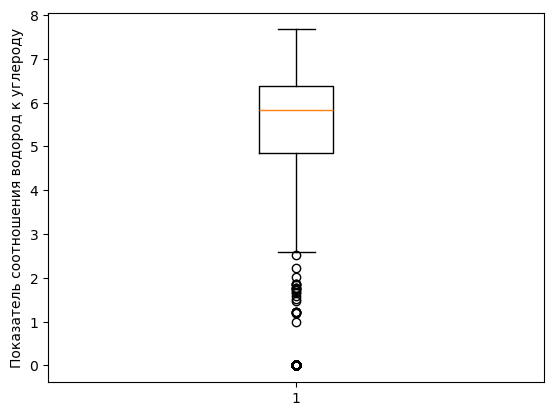

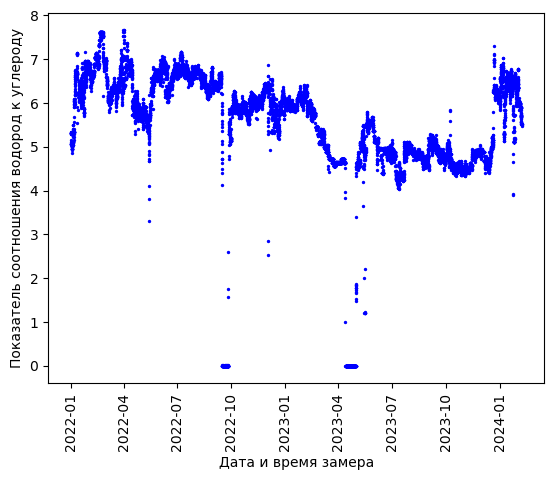

In [4]:
BoxMustache(PrimaryData, 'Показатель соотношения водород к углероду')
Graph(PrimaryData, 'Показатель соотношения водород к углероду')

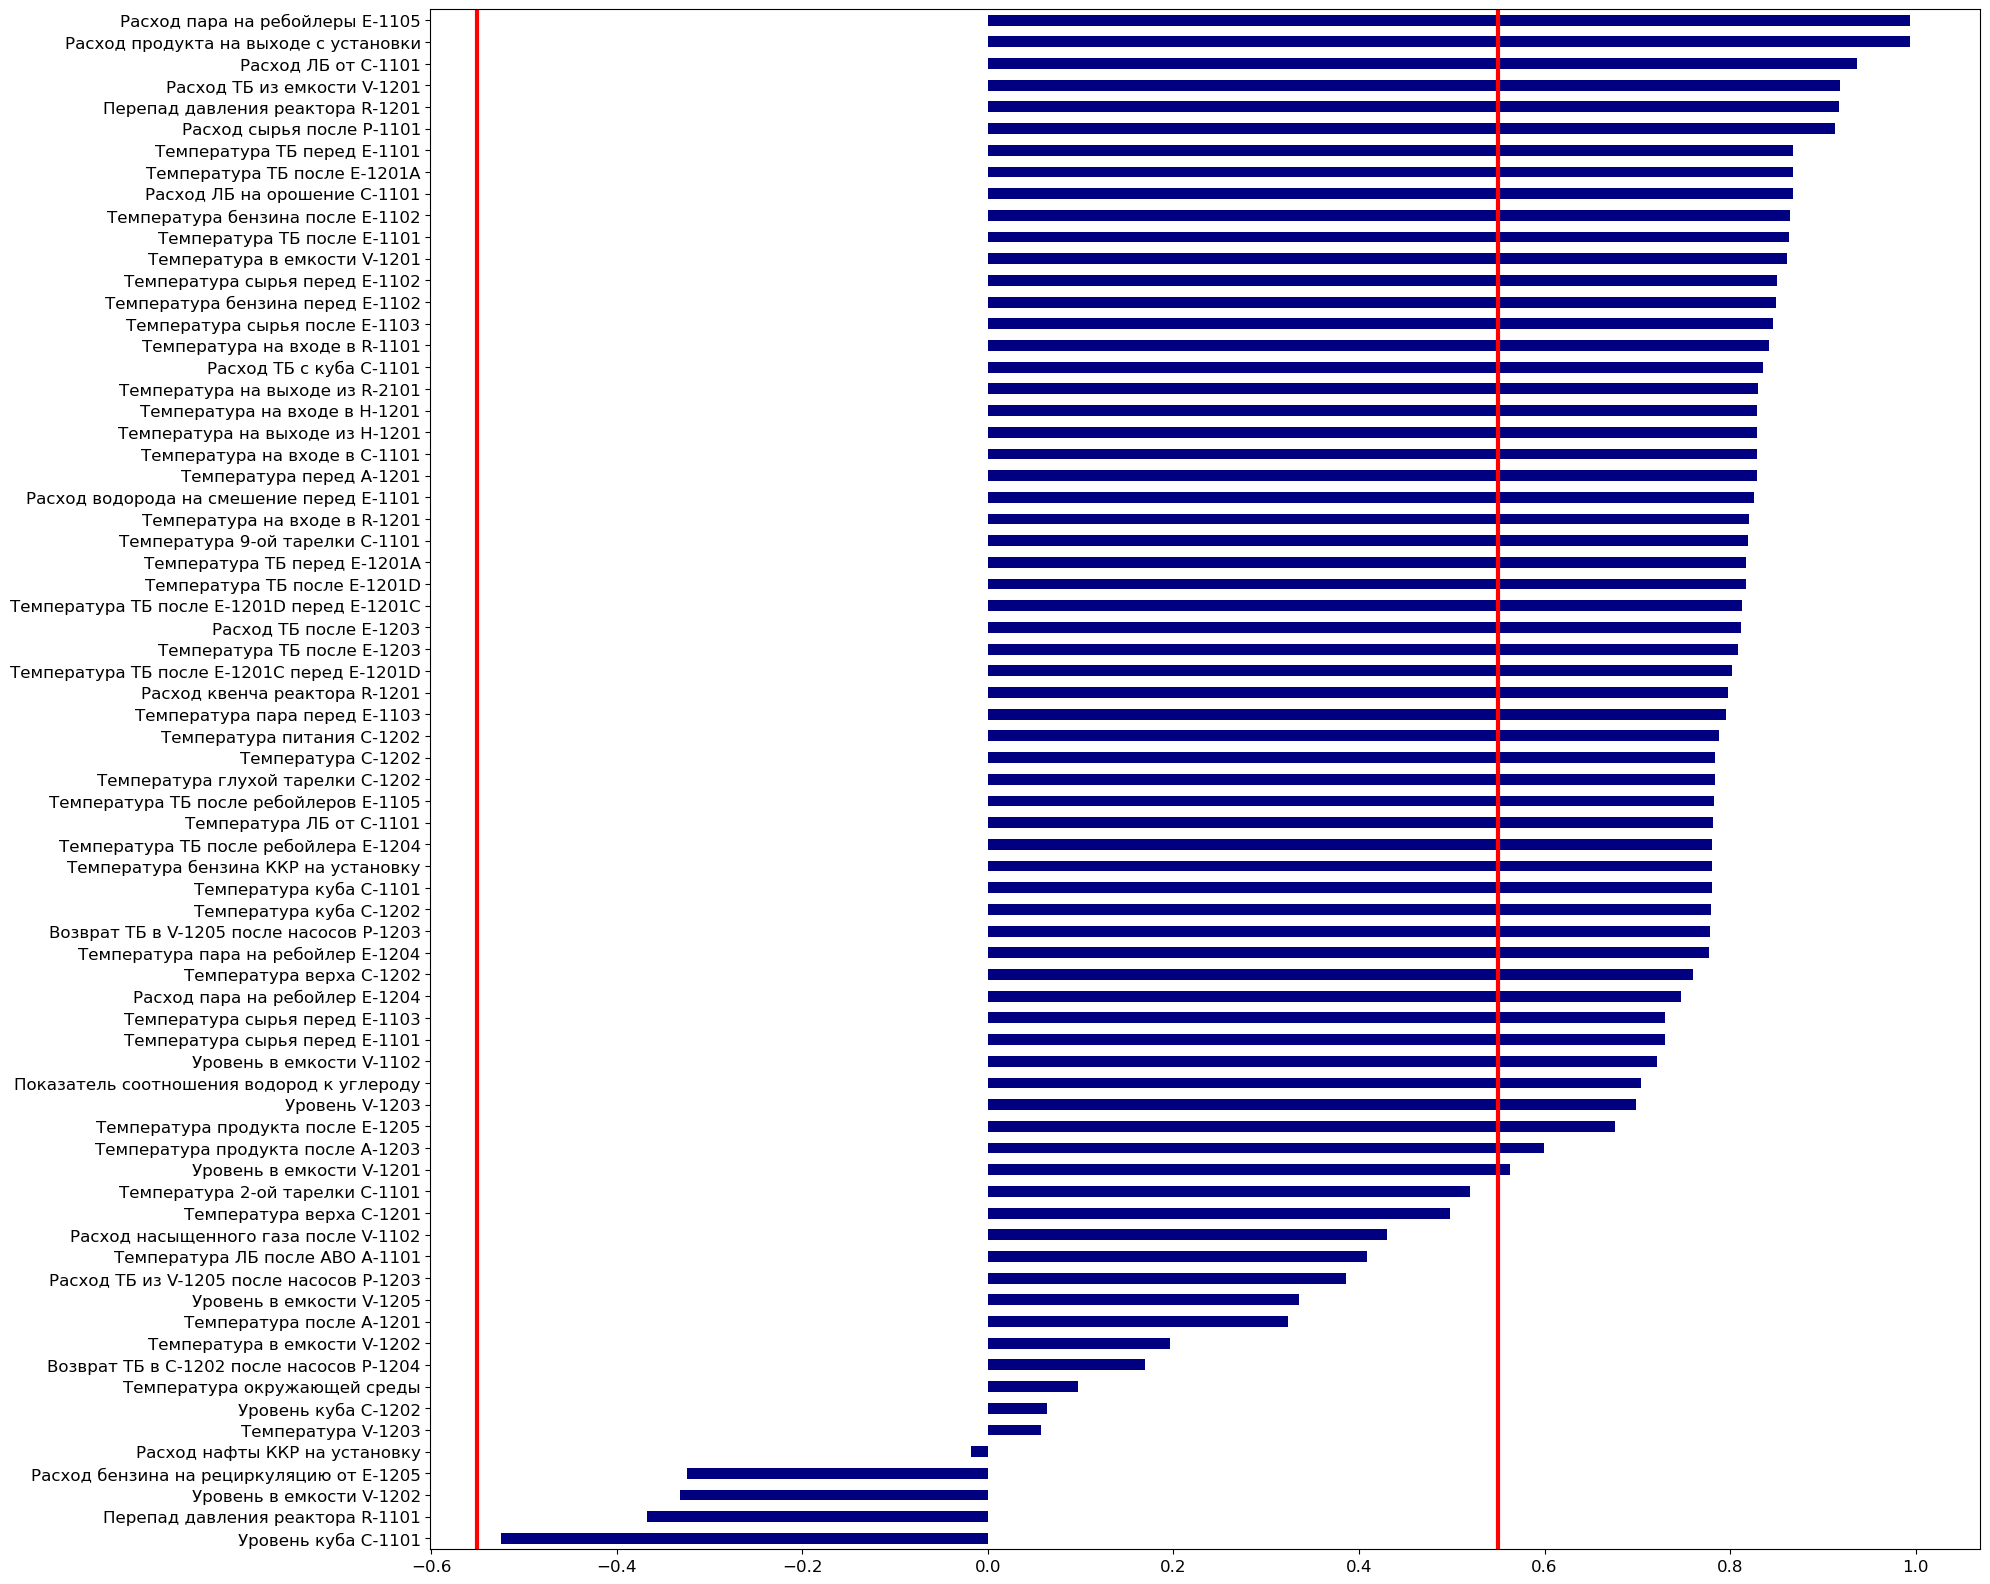

In [5]:
#Корреляция -> предобработка
#Определение корреляции параметров без предобработки
Correlation = PrimaryData.drop('DateTime', axis=1).corr()['Расход бензина ККР на установку']
Correlation.pop('Расход бензина ККР на установку')
Correlation.sort_values().plot(kind = 'barh', figsize=(20,20), fontsize=12, color = 'navy')
plt.axvline(x = 0.55, linewidth = 3, color = 'red')
plt.axvline(x = -0.55, linewidth = 3, color = 'red')

In [6]:
#Создание матрицы признаков с параметрами, имеющими корреляцию больше 0.55 по модулю
EditFeaturesMatrix_1 = FeaturesMatrix.copy(deep=True)
for name in EditFeaturesMatrix_1.drop('DateTime', axis=1).columns:
    if abs(Correlation[name])<0.55:
        EditFeaturesMatrix_1.pop(name)
EditFeaturesMatrix_1.columns

Index(['Температура бензина ККР на установку', 'Расход сырья после Р-1101',
       'Показатель соотношения водород к углероду',
       'Расход водорода на смешение перед Е-1101',
       'Температура сырья перед Е-1101', 'Температура сырья перед Е-1102',
       'Температура сырья перед Е-1103', 'Температура сырья после Е-1103',
       'Температура ТБ перед Е-1101', 'Температура ТБ после Е-1101',
       'Температура бензина перед Е-1102', 'Температура бензина после Е-1102',
       'Температура пара перед Е-1103', 'Температура на входе в R-1101',
       'Температура на входе в С-1101', 'Расход ЛБ от С-1101',
       'Температура ЛБ от С-1101', 'Температура 9-ой тарелки С-1101',
       'Температура куба С-1101', 'Расход ТБ с куба С-1101',
       'Расход пара на ребойлеры Е-1105',
       'Температура ТБ после ребойлеров Е-1105', 'Уровень в емкости V-1102',
       'Температура ТБ перед Е-1201А',
       'Температура ТБ после Е-1201С перед Е-1201D',
       'Температура ТБ после Е-1201D',
      

In [7]:
#Очистка выбросов по отклонению от абсолютного среднего + средним скользящим
def CleaningAbs(df, name):
    AbsAvrg = df[name].mean()
    AbsStd = df[name].std()
    for index in range(1, len(df[name])):
        if abs(df.loc[index, name]-AbsAvrg)>1.1*AbsStd:
            df.loc[index, name]=df.loc[index-1, name]

def CleaningSlide(df, name, W, S):
    SldAvrg = df[name].rolling(window=W).mean()
    SldStd = df[name].rolling(window=W).std()
    Slider = pd.DataFrame({'Скользящее среднее': SldAvrg, 'Скользящее стандартное отклонение': SldStd})
    for index in range(len(Slider)-1):
        if (abs(df.loc[index+1, name]-Slider.loc[index, 'Скользящее среднее']))>=S*Slider.loc[index, 'Скользящее стандартное отклонение']:
            df.loc[index+1, name]=df.loc[index, name]
            Slider.loc[index+1, 'Скользящее среднее'] = df.loc[index-W+2:index+1, name].mean()
            Slider.loc[index+1, 'Скользящее стандартное отклонение'] = df.loc[index-W+2:index+1, name].std()


In [8]:
EditFeaturesMatrixCleaned_1 = EditFeaturesMatrix_1.copy(deep=True)
TargetVectorCleaned = TargetVector.copy(deep=True)
Win = 900
Sigma = 3
ListOfTrash = pd.Series(EditFeaturesMatrixCleaned_1.columns.str.contains('Уровень'), index=EditFeaturesMatrixCleaned_1.columns)
for name in EditFeaturesMatrixCleaned_1.drop('DateTime', axis=1).columns:
    CleaningAbs(EditFeaturesMatrixCleaned_1, name)
    if ListOfTrash[name]==False:
        CleaningSlide(EditFeaturesMatrixCleaned_1, name, Win, Sigma)
CleaningAbs(TargetVectorCleaned, 'Расход бензина ККР на установку')
CleaningSlide(TargetVectorCleaned, 'Расход бензина ККР на установку', Win, Sigma)

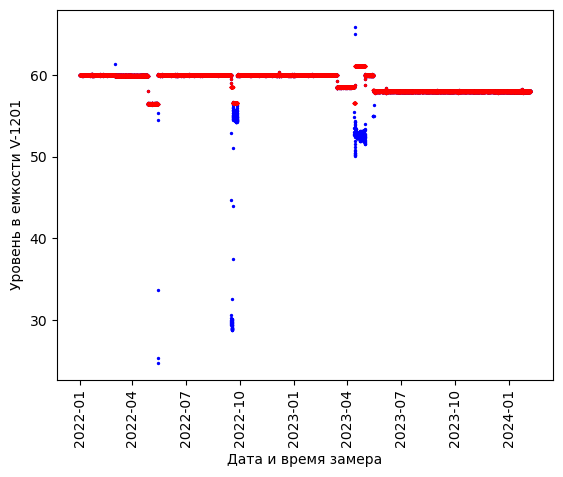

In [9]:
name = 'Уровень в емкости V-1201'
Graph(EditFeaturesMatrix_1, name, Single=False)
Graph(EditFeaturesMatrixCleaned_1, name, 'red')

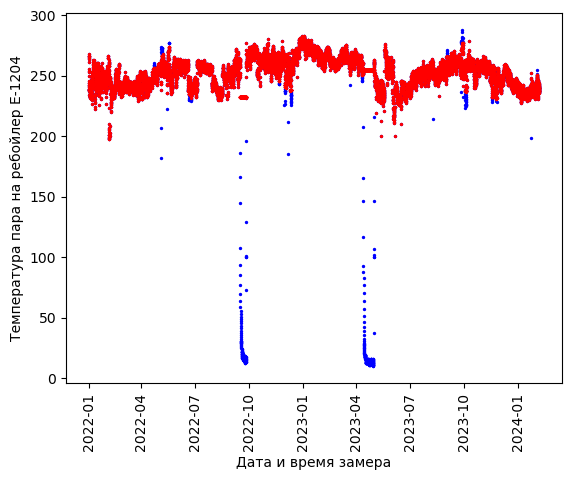

In [10]:
name = 'Температура пара на ребойлер Е-1204'
Graph(EditFeaturesMatrix_1, name, Single=False)
Graph(EditFeaturesMatrixCleaned_1, name, 'red')

In [11]:
#Предобработка -> корреляция
#Предобработка
FeaturesMatrixCleaned_2 = FeaturesMatrix.copy(deep=True)
Win = 900
Sigma = 3
ListOfTrash = pd.Series(FeaturesMatrixCleaned_2.columns.str.contains('Уровень'), index=FeaturesMatrixCleaned_2.columns)
for name in FeaturesMatrixCleaned_2.drop('DateTime', axis=1).columns:
    CleaningAbs(FeaturesMatrixCleaned_2, name)
    if ListOfTrash[name]==False:
        CleaningSlide(FeaturesMatrixCleaned_2, name, Win, Sigma)

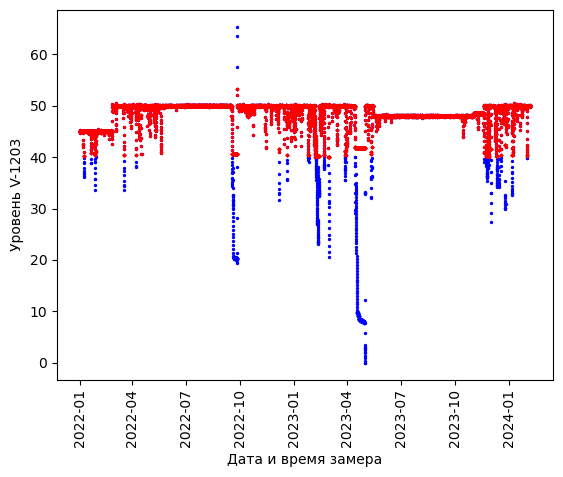

In [12]:
name = 'Уровень V-1203'
Graph(FeaturesMatrix, name, Single=False)
Graph(FeaturesMatrixCleaned_2, name, 'red')

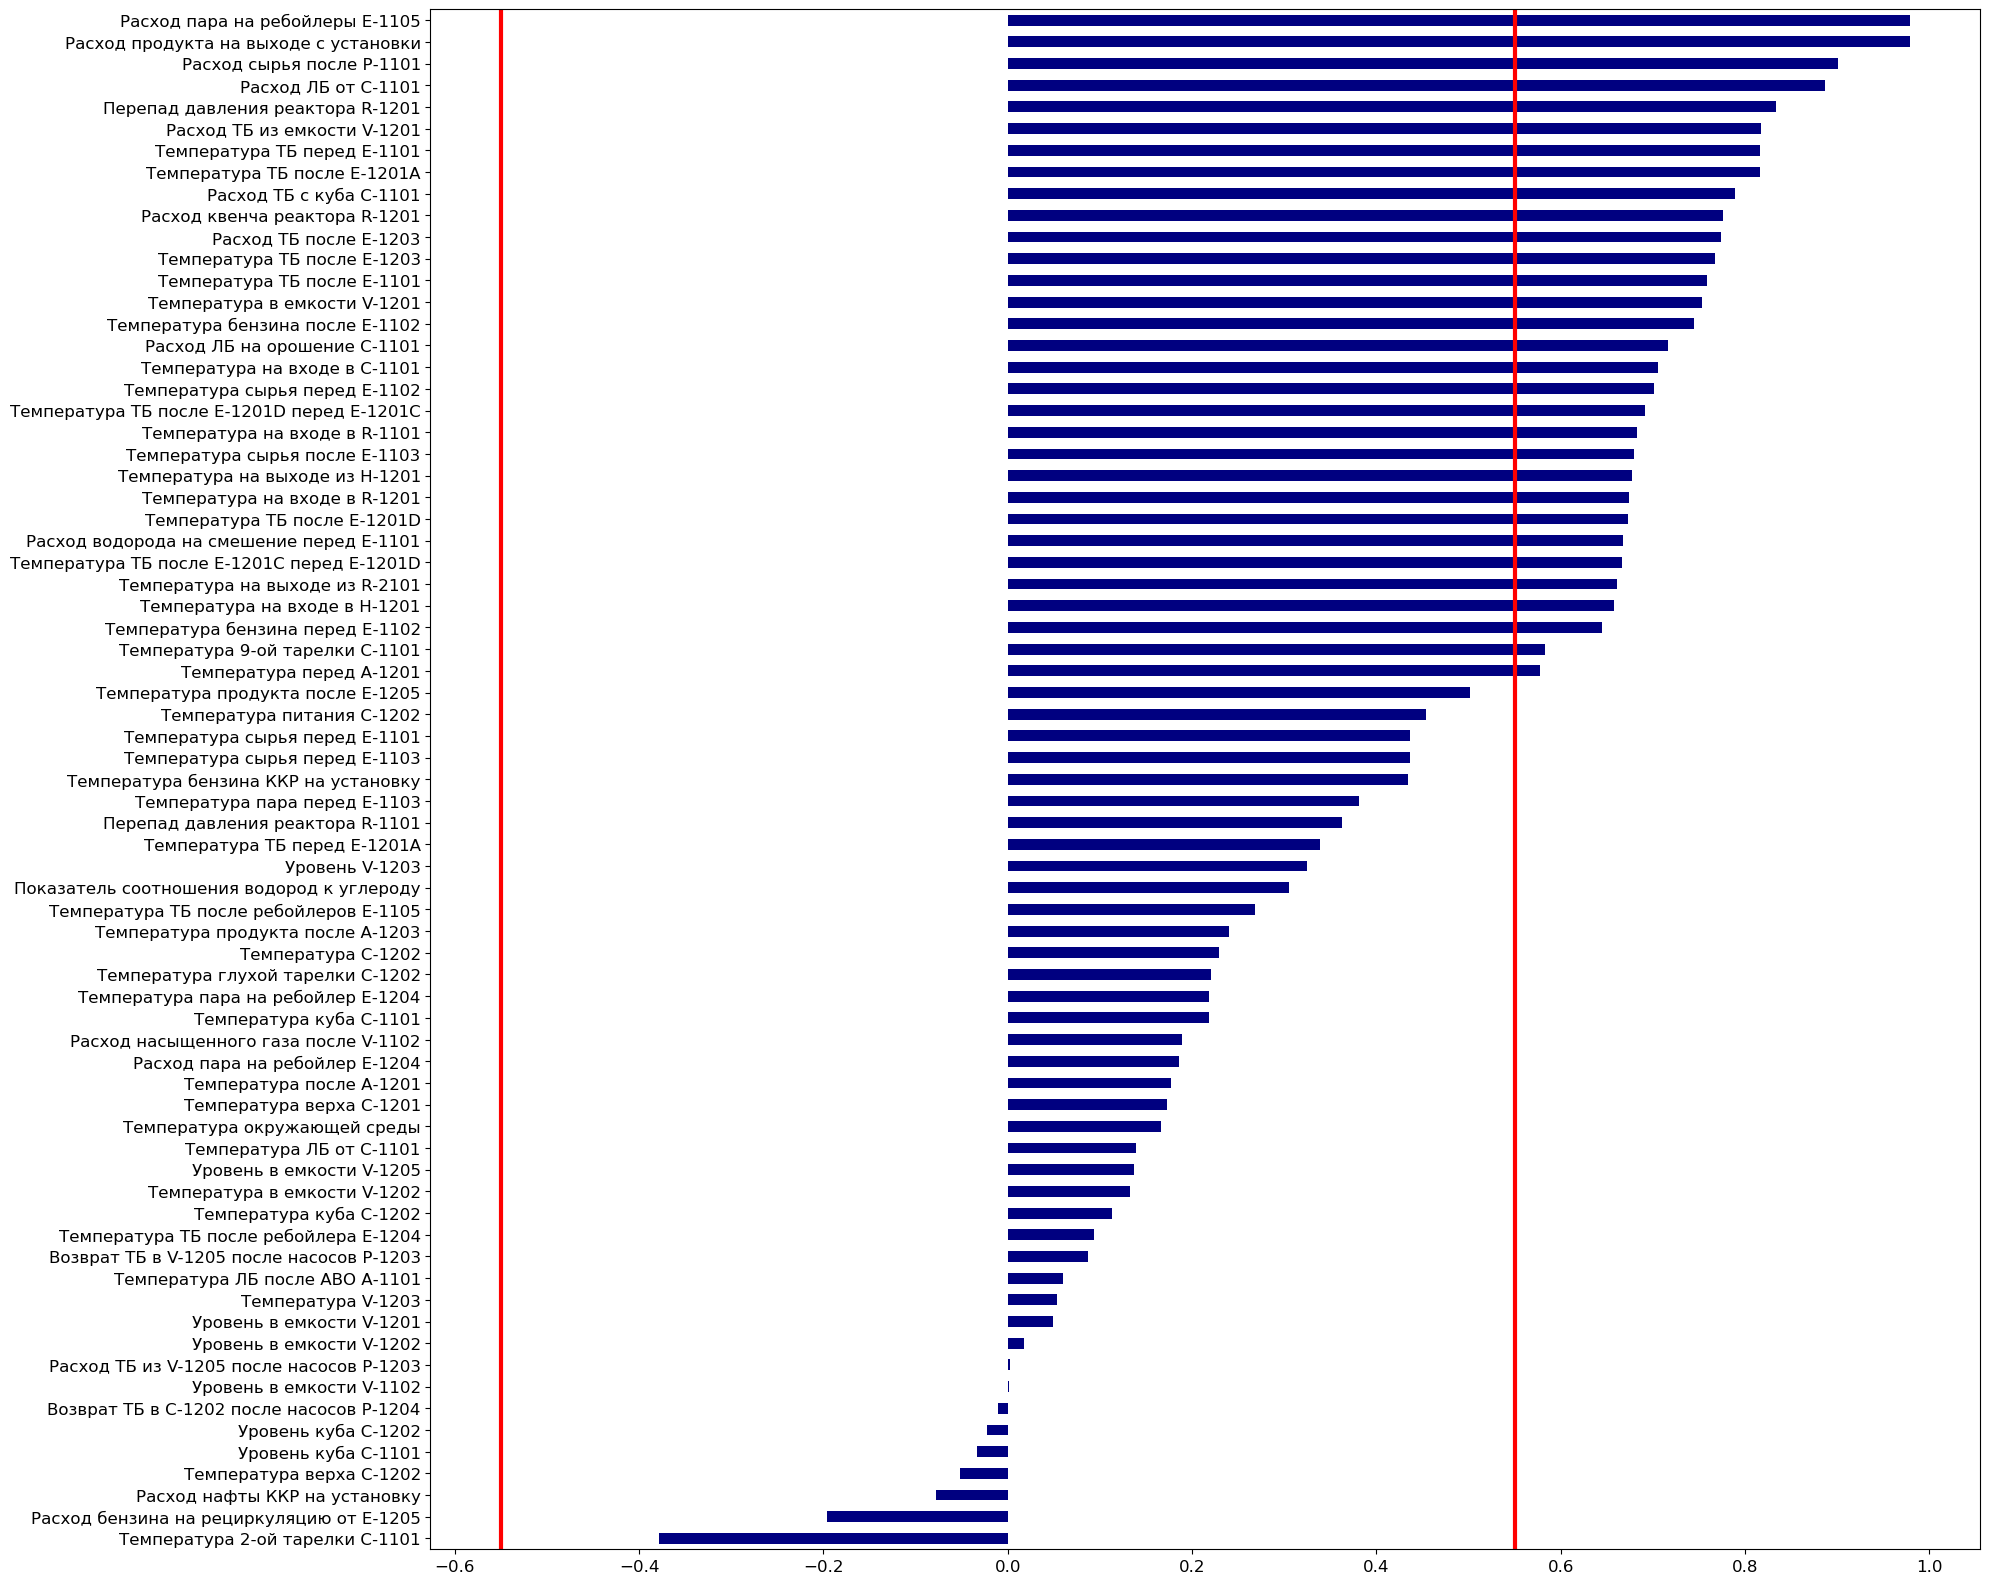

In [13]:
#Определение корреляции
CleanedData = TargetVectorCleaned.drop('DateTime', axis=1).join(FeaturesMatrixCleaned_2)
CorrelationCleaned = CleanedData.drop('DateTime', axis=1).corr()['Расход бензина ККР на установку']
CorrelationCleaned.pop('Расход бензина ККР на установку')
CorrelationCleaned.sort_values().plot(kind = 'barh', figsize=(20,20), fontsize=12, color = 'navy')
plt.axvline(x = 0.55, linewidth = 3, color = 'red')
plt.axvline(x = -0.55, linewidth = 3, color = 'red')

In [14]:
#Создание матрицы признаков с параметрами, имеющими корреляцию больше 0.55 по модулю
EditFeaturesMatrixCleaned_2 = FeaturesMatrixCleaned_2.copy(deep=True)
for name in FeaturesMatrixCleaned_2.drop('DateTime', axis=1).columns:
    if abs(CorrelationCleaned[name])<0.55:
        EditFeaturesMatrixCleaned_2.pop(name)
        CorrelationCleaned.pop(name)
EditFeaturesMatrixCleaned_2.columns
CorrelationCleaned = CorrelationCleaned.sort_values(ascending=False)
CorrelationCleaned

Расход продукта на выходе с установки         0.978927
Расход пара на ребойлеры Е-1105               0.978927
Расход сырья после Р-1101                     0.901180
Расход ЛБ от С-1101                           0.886994
Перепад давления реактора R-1201              0.833094
Расход ТБ из емкости V-1201                   0.817699
Температура ТБ после Е-1201A                  0.816280
Температура ТБ перед Е-1101                   0.816280
Расход ТБ с куба С-1101                       0.789265
Расход квенча реактора R-1201                 0.775921
Расход ТБ после Е-1203                        0.774134
Температура ТБ после Е-1203                   0.767501
Температура ТБ после Е-1101                   0.758146
Температура в емкости V-1201                  0.753193
Температура бензина после Е-1102              0.745057
Расход ЛБ на орошение С-1101                  0.715832
Температура на входе в С-1101                 0.705716
Температура сырья перед Е-1102                0.701299
Температур

In [15]:
def Heatmap(df):
    return df.style.background_gradient(cmap='coolwarm')

In [16]:
CrossCorrelation = EditFeaturesMatrixCleaned_2.drop('DateTime', axis=1).corr()
Heatmap(CrossCorrelation)

,Расход сырья после Р-1101,Расход водорода на смешение перед Е-1101,Температура сырья перед Е-1102,Температура сырья после Е-1103,Температура ТБ перед Е-1101,Температура ТБ после Е-1101,Температура бензина перед Е-1102,Температура бензина после Е-1102,Температура на входе в R-1101,Температура на входе в С-1101,Расход ЛБ от С-1101,Температура 9-ой тарелки С-1101,Расход ТБ с куба С-1101,Расход пара на ребойлеры Е-1105,Температура ТБ после Е-1201С перед Е-1201D,Температура ТБ после Е-1201D,Температура ТБ после Е-1201D перед Е-1201C,Температура ТБ после Е-1201A,Расход ЛБ на орошение С-1101,Температура на входе в R-1201,Перепад давления реактора R-1201,Расход квенча реактора R-1201,Температура на выходе из R-2101,Температура на входе в H-1201,Температура на выходе из H-1201,Температура в емкости V-1201,Расход ТБ из емкости V-1201,Температура перед А-1201,Расход ТБ после Е-1203,Температура ТБ после Е-1203,Расход продукта на выходе с установки
Расход сырья после Р-1101,1.000000,0.666498,0.660040,0.606868,0.858035,0.748406,0.557790,0.684009,0.610623,0.672432,0.955293,0.656212,0.907278,0.913636,0.716251,0.602191,0.678771,0.858035,0.713285,0.606967,0.886651,0.790036,0.598995,0.600225,0.606502,0.745909,0.935915,0.563736,0.894019,0.806122,0.913636
Расход водорода на смешение перед Е-1101,0.666498,1.000000,0.584008,0.655654,0.723681,0.566023,0.842122,0.827716,0.652143,0.734268,0.714244,0.455857,0.510677,0.670341,0.434387,0.513998,0.499080,0.723681,0.750644,0.519251,0.569976,0.654524,0.542343,0.533126,0.595862,0.544918,0.566006,0.407868,0.499298,0.614443,0.670341
Температура сырья перед Е-1102,0.660040,0.584008,1.000000,0.650658,0.875138,0.979732,0.667602,0.821428,0.688762,0.826927,0.632335,0.416779,0.643813,0.691104,0.639131,0.829014,0.775835,0.875138,0.621969,0.821033,0.734608,0.758098,0.841005,0.825280,0.865176,0.978996,0.649823,0.763565,0.650400,0.873981,0.691104
Температура сырья после Е-1103,0.606868,0.655654,0.650658,1.000000,0.676176,0.646455,0.905112,0.899082,0.986846,0.806023,0.620276,0.292041,0.539372,0.676276,0.599106,0.701932,0.677573,0.676176,0.563806,0.702801,0.621043,0.548322,0.677835,0.670112,0.702928,0.633997,0.569968,0.502186,0.538192,0.609964,0.676276
Температура ТБ перед Е-1101,0.858035,0.723681,0.875138,0.676176,1.000000,0.901552,0.681744,0.830806,0.692054,0.802722,0.823840,0.534609,0.806286,0.823461,0.690599,0.782737,0.770312,1.000000,0.675927,0.781352,0.851848,0.856955,0.800136,0.802272,0.848555,0.894418,0.826003,0.675670,0.805200,0.891390,0.823461
Температура ТБ после Е-1101,0.748406,0.566023,0.979732,0.646455,0.901552,1.000000,0.629294,0.798744,0.680787,0.823288,0.694085,0.462488,0.758649,0.748986,0.705617,0.825047,0.810010,0.901552,0.628985,0.819635,0.820288,0.796529,0.833219,0.823671,0.848131,0.997204,0.755761,0.771325,0.762205,0.897146,0.748986
Температура бензина перед Е-1102,0.557790,0.842122,0.667602,0.905112,0.681744,0.629294,1.000000,0.941358,0.910886,0.827866,0.610045,0.309607,0.439201,0.633768,0.488055,0.655017,0.599672,0.681744,0.674610,0.656358,0.538165,0.573670,0.660362,0.640491,0.704031,0.608762,0.483301,0.494823,0.437255,0.601639,0.633768
Температура бензина после Е-1102,0.684009,0.827716,0.821428,0.899082,0.830806,0.798744,0.941358,1.000000,0.910018,0.921686,0.695869,0.396193,0.603979,0.736362,0.630190,0.772663,0.731682,0.830806,0.702801,0.771870,0.691818,0.711273,0.772453,0.760571,0.812848,0.784144,0.632189,0.595529,0.602899,0.752875,0.736362
Температура на входе в R-1101,0.610623,0.652143,0.688762,0.986846,0.692054,0.680787,0.910886,0.910018,1.000000,0.826621,0.627472,0.312624,0.548915,0.680169,0.617077,0.726184,0.698700,0.692054,0.577686,0.726634,0.623320,0.554052,0.703838,0.686455,0.725151,0.668520,0.573300,0.542772,0.551455,0.637764,0.680169
Температура на входе в С-1101,0.672432,0.734268,0.826927,0.806023,0.802722,0.823288,0.827866,0.921686,0.826621,1.000000,0.637613,0.486395,0.653929,0.701715,0.663303,0.726794,0.723435,0.802722,0.620143,0.725498,0.710420,0.670642,0.722295,0.709619,0.752126,0.

In [17]:
#Чистка кросс-коррелирующих признаков
CorrelationDoubleCleaned = CorrelationCleaned.copy(deep=True)
ListOfMainNames = []
for MainName in CorrelationCleaned.index:
    ListOfMainNames.append(MainName)
    for CheckName in (CorrelationCleaned.drop(ListOfMainNames).index):
        if (CrossCorrelation.loc[MainName, CheckName] > 0.7) and (MainName in CorrelationDoubleCleaned) and (CheckName in CorrelationDoubleCleaned):
            CorrelationDoubleCleaned.pop(CheckName)
CorrelationDoubleCleaned

Расход продукта на выходе с установки         0.978927
Температура сырья перед Е-1102                0.701299
Температура на входе в R-1101                 0.682873
Расход водорода на смешение перед Е-1101      0.667008
Температура ТБ после Е-1201С перед Е-1201D    0.666226
Температура 9-ой тарелки С-1101               0.583343
Name: Расход бензина ККР на установку, dtype: float64

In [18]:
CrossCorrelationCleaned = CrossCorrelation.copy(deep=True)
for name in CrossCorrelation.columns:
    if not(name in CorrelationDoubleCleaned):
        CrossCorrelationCleaned = CrossCorrelationCleaned.drop(name)
        CrossCorrelationCleaned = CrossCorrelationCleaned.drop(name, axis=1)
Heatmap(CrossCorrelationCleaned)

,Расход водорода на смешение перед Е-1101,Температура сырья перед Е-1102,Температура на входе в R-1101,Температура 9-ой тарелки С-1101,Температура ТБ после Е-1201С перед Е-1201D,Расход продукта на выходе с установки
Расход водорода на смешение перед Е-1101,1.000000,0.584008,0.652143,0.455857,0.434387,0.670341
Температура сырья перед Е-1102,0.584008,1.000000,0.688762,0.416779,0.639131,0.691104
Температура на входе в R-1101,0.652143,0.688762,1.000000,0.312624,0.617077,0.680169
Температура 9-ой тарелки С-1101,0.455857,0.416779,0.312624,1.000000,0.406924,0.575500
Температура ТБ после Е-1201С перед Е-1201D,0.434387,0.639131,0.617077,0.406924,1.000000,0.673542
Расход продукта на выходе с установки,0.670341,0.691104,0.680169,0.575500,0.673542,1.000000
